# 8. Optimization: Exercise

Name: 

Date: 

## 1. Try with you own function 
1) Define a function of your interest (with two or more inputs) to be minimized or maximized.  
It can be an explicit mathematical form, or given implictly as a result of simulation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def psin(x, a):
    """sine in a parabola
    a: direction of sine wave"""
    x = np.array(x)
    a = np.array(a)
    # for single vector x
    #y = np.sum(x*x,0) + np.sin(a@x)
    # for x by meshgrid
    y = np.sum(x*x,0) + np.sin(np.tensordot(a,x,axes=1))
    #y = np.sum(x*x,0) + np.squeeze(np.sin(a.reshape((-1,1))@x))
    return y

def psin_grad(x, a):
    """sine in a parabola
    a: direction of sine wave"""
    x = np.array(x)
    a = np.array(a)
    # for single vector x
    #dy = 2*x + a*np.cos(a@x)
    # for x by meshgrid
    #dy = 2*x + np.tensordot(a,np.cos(a@x),axes=1)
    dy = 2*x + np.squeeze(np.outer(a,np.cos(a@x)))
    return dy

In [13]:
a = np.array([1,0.2])
x = np.array([1,2])
psin(x,a)

5.98544972998846

In [14]:
psin_grad(x,a)

array([2.16996714, 4.03399343])

(-3.0, 3.0, -3.0, 3.0)

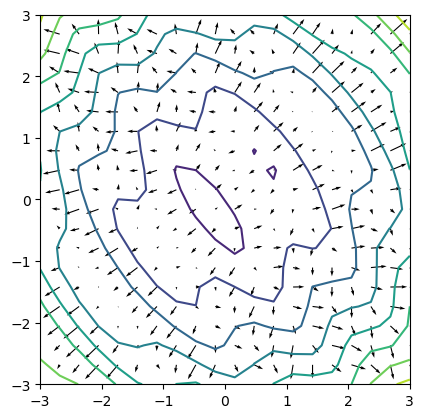

In [15]:
w = 3
N = 20
a = [4,3]
X = np.linspace(-w,w,N)
X1, X2 = np.meshgrid(X,X)
#fx = psin([X1,X2],a)
#dfx = psin_grad((X1,X2),a)
fx = np.zeros((N,N))
dfx = np.zeros((2,N,N))
for i, x1 in enumerate(X):
    for j, x2 in enumerate(X):
        fx[j,i] = psin([x1, x2], a)
        dfx[:,j,i] = psin_grad([x1, x2], a)
plt.contour(X1, X2, fx)
plt.quiver(X1, X2, 0.01*dfx[0], 0.01*dfx[1])
plt.axis('square')        

In [ ]:
plt.contour(X1, X2, fx)
plt.quiver(X1, X2, 0.01*dfx[0], 0.01*dfx[1])
plt.axis('square')

In [316]:
# N dim Gabor function
def gabor(x, a):
    """Gabor function: Gaussian weighted sine"""
    x = np.array(x)
    a = np.array(a)
    #print(x.shape,a.shape)
    #y = np.exp(-0.5*x@x)*np.sin(a@x)
    y = np.exp(-0.5*np.sum(x*x,0))*np.sin(a@x)
    return y

def gabor_grad(x, a):
    """Gradient of Gabor function"""
    x = np.array(x)
    a = np.array(a)
    # for now assume x is a vector, not matrix
    #y = np.exp(-0.5*x@x)*(-x*np.sin(a@x) + a*np.cos(a@x))
    dy = np.exp(-0.5*np.sum(x*x,0))*(-x*np.sin(a@x) + np.squeeze(np.outer(a,np.cos(a@x))))
    return dy

In [309]:
np.sum?

In [317]:
a = np.array([1,0.2])
x = np.array([1,2])
gabor(x,a)

0.0808906397300242

In [318]:
x3 = np.array([[1,2,3],[2,3,4]])
gabor(x3,a)

array([ 8.08906397e-02,  7.75024966e-04, -2.28018215e-06])

In [259]:
gabor_grad(x,a)

array([-0.06693889, -0.15899093])

In [297]:
gabor_grad(x,a)

array([-0.06693889, -0.15899093])

In [298]:
gabor_grad(x3,a)

array([[-6.69388870e-02, -2.83833007e-03,  3.89288412e-06],
       [-1.58990929e-01, -2.58273093e-03,  8.53119613e-06]])

In [271]:
a@x

1.4

In [283]:
a@x3

array([1.4, 2.6, 3.8])

In [272]:
x*(a@x)

array([1.4, 2.8])

In [266]:
x3*(a@x3)

array([[ 1.4,  5.2, 11.4],
       [ 2.8,  7.8, 15.2]])

In [285]:
a*(a@x)

array([1.4 , 0.28])

In [294]:
np.squeeze(np.outer(a,(a@x)))

array([1.4 , 0.28])

In [295]:
np.squeeze(np.outer(a,(a@x3)))

array([[1.4 , 2.6 , 3.8 ],
       [0.28, 0.52, 0.76]])

In [268]:
a.reshape((-1,1))*(a@x)

array([[1.4 ],
       [0.28]])

In [273]:
a.reshape((-1,1))*(a@x3)

array([[1.4 , 2.6 , 3.8 ],
       [0.28, 0.52, 0.76]])

In [292]:
np.squeeze?

In [279]:
np.multiply?

2) Visualize the function, e.g., by surface plot or contour plot.

In [299]:
w = 2
N = 20
a = [1,0.5]
X = np.linspace(-w,w,N)
X1, X2 = np.meshgrid(X,X)
fx = np.zeros((N,N))
dfx = np.zeros((2,N,N))
for i, x1 in enumerate(X):
    for j, x2 in enumerate(X):
        fx[j,i] = gabor([x1, x2], a)
        dfx[:,j,i] = gabor_grad([x1, x2], a)

(-2.0, 2.0, -2.0, 2.0)

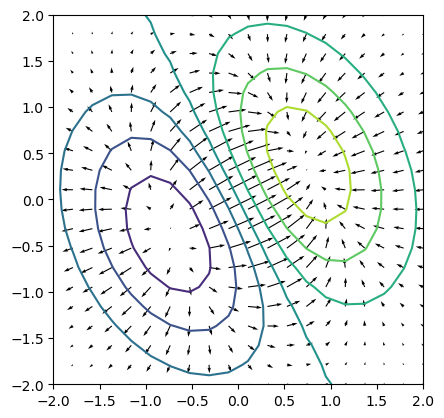

In [300]:
plt.contour(X1, X2, fx)
plt.quiver(X1, X2, 0.01*dfx[0], 0.01*dfx[1])
plt.axis('square')

3) Maxmize or minimize the function using two or more optimization algorithms, e.g.

* Gradient ascent/descent
* Newton-Raphson method
* Evolutionary algorithm
* scpy.optimize

and compare the results with different starting points and parameters. 

In [301]:
def grad_descent(f, df, x0, *args, eta=0.01, eps=1e-6, imax=1000):
    """Gradient descent"""
    xh = np.zeros((imax+1, len(np.ravel([x0]))))  # history
    xh[0] = x0
    #print(args[0])
    f0 = f(x0, args[0])  # initialtization
    for i in range(imax):
        x1 = x0 - eta*df(x0, args[0])
        f1 = f(x1, args[0])
        # print(x1, f1)
        xh[i+1] = x1
        if(f1 <= f0 and f1 > f0 - eps):  # small decrease
            return(x1, f1, xh[:i+2])
        x0 = x1
        f0 = f1
    print("Failed to converge in ", imax, " iterations.")
    return(x1, f1, xh)

[-0.75241723 -0.35667471] -0.567092625639109


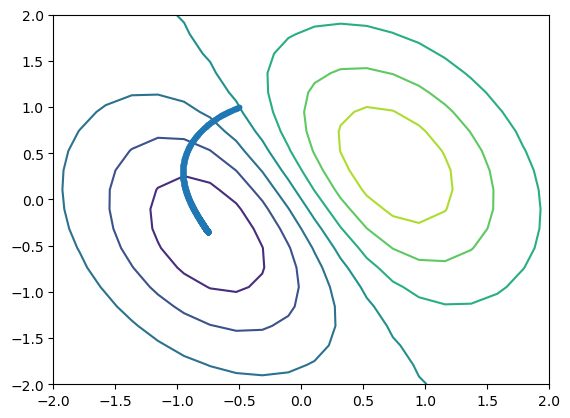

In [303]:
xmin, fmin, xhist = grad_descent(gabor, gabor_grad, [-0.5,1], a)
print(xmin, fmin)
plt.contour(X1, X2, fx)
plt.plot(xhist[:,0], xhist[:,1], '.-');
#plt.axis([1, 4, -1, 3])

In [52]:
from scipy.optimize import minimize

In [306]:
result = minimize(gabor, [-2,2], args=([1,0.5],), options={'disp': True})
print( result.x, result.fun)

Optimization terminated successfully.
         Current function value: -0.567179
         Iterations: 7
         Function evaluations: 42
         Gradient evaluations: 14
[-0.74460536 -0.37230274] -0.5671791872249574


In [56]:
minimize?

Option) Set equality or inequality constraints and apply an algorithm for constrained optimization.